In [98]:
import urllib.request
import json
import pymongo
import pandas as pd
import datetime
import geopy
import warnings
warnings.simplefilter('ignore')

In [72]:
# get the bbc rss feed of news stories and connect to it
earthquake_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/significant_month.geojson"

def load_earthquakes():
    try:
        response = urllib.request.urlopen(earthquake_url)
    except urllib.error.URLError as e:
        if hasattr(e, 'reason'):
            print('We failed to reach a server.')
            print('Reason: ', e.reason)
        elif hasattr(e, 'code'):
            print('The server couldn\'t fulfill the request.')
            print('Error code: ', e.code)
    else:
        # the url request was successful - convert the response to a string
        json_string = response.read().decode('utf-8')

        # the json package loads() converts the string to python dictionaries and lists
        eq_json = json.loads(json_string)

        # from the json dictionary we get the title to print
        title = eq_json['metadata']['title']
        print('Collected data from', title)
        #  and we get the list of earthquakes
        quake_list = eq_json['features']
        return quake_list

def get_earthquakes():
        quakelist = load_earthquakes()
        
        quake_docs = []
        for doc in quakelist:
            place = doc["properties"]["place"]
            # grab unix timestamp in milliseconds
            unix_time_mil = doc["properties"]["time"]            
            # convert to unix in seconds
            unix_time = unix_time_mil / 1000
            unix_time = datetime.datetime.fromtimestamp(unix_time).isoformat()
            coords = doc["geometry"]["coordinates"]
            lng, lat, _ = coords
            quake_docs.append([place,unix_time,lat,lng])

        quake_df = pd.DataFrame(quake_docs,columns = ['place','date','latitude','longitude'])
        
        return quake_df

In [74]:
earth_quakes = get_earthquakes()
print(earth_quakes)

Collected data from USGS Significant Earthquakes, Past Month
                                               place  \
0  130km S of Bristol Island, South Sandwich Islands   
1                          18km E of Little Lake, CA   
2                5km WSW of South Hutchinson, Kansas   
3                4km WSW of South Hutchinson, Kansas   
4                          15km SSE of Su'ao, Taiwan   
5                           61km ENE of Namie, Japan   
6                 102km WSW of Tugu Hilir, Indonesia   
7                      95km SW of San Antonio, Chile   
8                        62km E of Lakatoro, Vanuatu   
9                 24km S of La Libertad, El Salvador   

                         date   latitude  longitude  
0  2019-08-27T19:55:20.479000 -60.208800   -26.5327  
1  2019-08-22T16:49:50.060000  35.907333  -117.7090  
2  2019-08-18T04:45:29.680000  38.014600   -98.0050  
3  2019-08-16T08:59:10.388000  38.010100   -97.9879  
4  2019-08-07T17:28:03.613000  24.480800   121.9326 

In [64]:
import os

# this solves a bug with the asemap installation
os.environ['PROJ_LIB'] = 'c:/Users/gregb/Anaconda3/pkgs/proj4-5.2.0-ha925a31_1/Library/share'

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


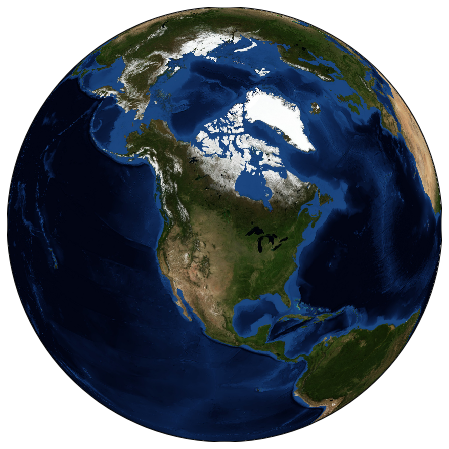

In [65]:
# let's test the basemap installation
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


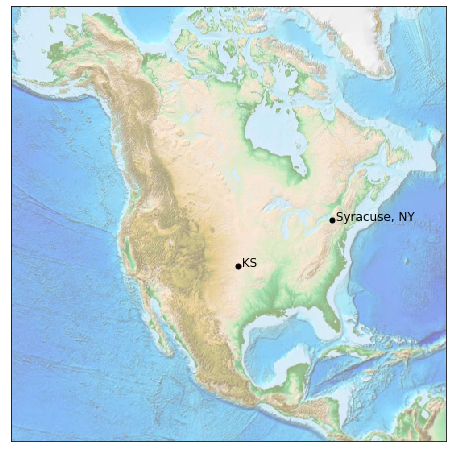

In [71]:
# let's test the map with basi lat/longs
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None, width=8E6, height=8E6, lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting

# 43.03474° N, -76.13881° E
x, y = m(-76.13881, 43.03474)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Syracuse, NY', fontsize=12);
x,y= m(-98.0050, 38.014600)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' KS', fontsize=12);


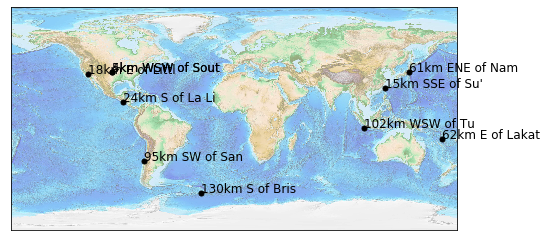

In [100]:
# let's test the map with basi lat/longs
fig = plt.figure(figsize=(8, 8))
m = Basemap(width=8E6, height=8E6)
m.etopo(scale=0.5, alpha=0.5)

def plot_earthquake(r,row):
    x,y=m(row['longitude'],row['latitude'])
    plt.plot(x,y, 'ok', markersize=5)
    plt.text(x,y, row['place'][0:15], fontsize=12)
    
rc=earth_quakes.apply(lambda row: plot_earthquake(m,row), axis=1)
#earth_quakes.apply(lambda row: plt.plot(m(row['longitude'],row['latitude']), 'ok', markersize=5), axis=1)

#for place,lat,lng in earth_quakes[['place','latitude','longitude']]:
 #   x,y = m(lng, lat)
  #  plt.plot(x, y, 'ok', markersize=5)
   # plt.text(x, y,place[0:20], fontsize=10);
# Map (long, lat) to (x, y) for plotting
#plt.plot(earth_quakes['longitude'], earth_quakes['latitude'], 'ok', markersize=5)
#plt.text(earth_quakes['longitude'], earth_quakes['latitude'], earth_quakes['longitude'], earth_quakes['place'][0:20], fontsize=12);